# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [2]:
pd.set_option("display.max_rows",1000)
df1=pd.read_csv("application_data.csv")
df2=pd.read_csv("previous_application.csv")

In [3]:
#Check the data types and null values of the current application data set
df1.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [4]:
#Check the data types and null values of the previous application data set
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [5]:
#Print the columns with more than 40% of the missing data from the current application data set
temp=(100*df1.isnull().mean()).reset_index()
temp=temp.rename(columns={"index":"Column Name",0:"% Missing Value"})
temp=temp.sort_values("% Missing Value",ascending=False)
drop_cols=list(temp[temp["% Missing Value"]>40]["Column Name"])
print(drop_cols)

['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI', 'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE

In [6]:
#Drop the columns with more than 40% of the missing data from the current application data set
df3=df1.drop(drop_cols,axis=1)
df3.shape

(307511, 73)

In [7]:
#Print the columns with more than 40% of the missing data from the previous application data set
temp1=(100*df2.isnull().mean()).reset_index()
temp1=temp1.rename(columns={"index":"Column Name",0:"% Missing Value"})
temp1=temp1.sort_values("% Missing Value",ascending=False)
drop_cols1=list(temp1[temp1["% Missing Value"]>40]["Column Name"])
print(drop_cols1)

['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'NFLAG_INSURED_ON_APPROVAL', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING']


In [8]:
#Drop the columns with more than 40% of the missing data from the previous application data set
df4=df2.drop(drop_cols1,axis=1)
df4.shape

(1670214, 26)

In [9]:
# Check the final columns details in the current application data set
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [10]:
# Check the final columns details in the previous application data set
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [11]:
# Check the first five rows in the current application data set after dropping the columns
df3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Check the first five rows in the previous application data set after dropping the columns
df4.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [13]:
#Check the null values in the columns of current application data set
df3.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [14]:
#Check the value counts of each occupation category
df3['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [15]:
#Check the value counts of each occupation category
df3['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [16]:
#Impute the missing values for continuous columns in current application data set
cont_cols=["AMT_ANNUITY","AMT_GOODS_PRICE","CNT_FAM_MEMBERS","OBS_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
for i in cont_cols:
    median_=df3[i].median()
    df3[i]=df3[i].fillna(median_)

In [17]:
#Impute the missing values for categorical columns in current application data set
cat_cols=["NAME_TYPE_SUITE"]
for i in cat_cols:
    mode_=df3[i].mode()[0]
    df3[i]=df3[i].fillna(mode_)

In [18]:
#Impute the missing values for continuous columns in current application data set
cont_cols1=["EXT_SOURCE_2","EXT_SOURCE_3"]
for i in cont_cols1:
    mean_=df3[i].mean()
    df3[i]=df3[i].fillna(mean_)

In [19]:
#Check the null values in the columns of previous application data set
df4.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [20]:
#Impute the missing values for continuous columns in previous application data set
cont_cols2=["AMT_CREDIT"]
for i in cont_cols2:
    median_1=df4[i].median()
    df4[i]=df4[i].fillna(median_1)

In [21]:
#Impute the missing values for categorical columns in previous application data set
cat_cols1=["PRODUCT_COMBINATION"]
for i in cat_cols1:
    mode_1=df4[i].mode()[0]
    df4[i]=df4[i].fillna(mode_1)

# Current Application Outlier Treatment 

### Describe each column and create box plot

In [22]:
pd.set_option('display.max_columns',None)
df3.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152664,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.417523,0.142944,1.400626,0.099717,-962.858119,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.005538,0.006055,0.029723,0.231293,0.229631,1.778463
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910679,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.908550e-01,0.174464,2.398395,0.446033,2.377224,0.361735,826.807226,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.078014,0.103037,0.190728,0.856810,0.744059,1.765523
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

<AxesSubplot:xlabel='CNT_CHILDREN'>

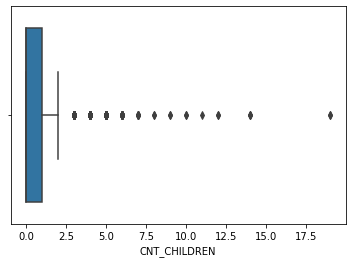

In [23]:
sns.boxplot(df3.CNT_CHILDREN)

<AxesSubplot:xlabel='REGION_POPULATION_RELATIVE'>

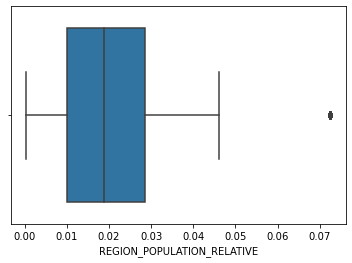

In [24]:
sns.boxplot(df3.REGION_POPULATION_RELATIVE)

In [25]:
#Convert the 'DAYS_BIRTH' column to years,insert the column in the data set,name it and describe the variable
df3['DAYS_BIRTH']=df3['DAYS_BIRTH'].abs()
df3.insert(18,column='YEAR_BIRTH',value=df3.DAYS_BIRTH/365)
df3.YEAR_BIRTH=df3.YEAR_BIRTH.round(decimals=0)
df3.YEAR_BIRTH=df3.YEAR_BIRTH.astype('int64')
df3.YEAR_BIRTH.describe()

count    307511.000000
mean         43.938646
std          11.964047
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: YEAR_BIRTH, dtype: float64

<AxesSubplot:xlabel='YEAR_BIRTH'>

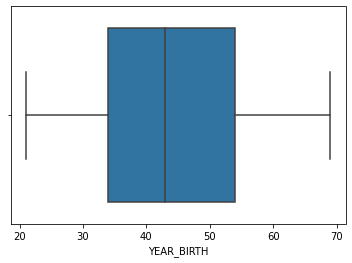

In [26]:
sns.boxplot(df3.YEAR_BIRTH)

In [27]:
#Convert the 'DAYS_EMPLOYED' column to years,insert the column in the data set,name it and describe the variable
df3['DAYS_EMPLOYED']=df3['DAYS_EMPLOYED'].abs()
df3.insert(20,column='YEAR_EMPLOYED',value=df3.DAYS_EMPLOYED/365)
df3.YEAR_EMPLOYED=df3.YEAR_EMPLOYED.round(decimals=0)
df3.YEAR_EMPLOYED=df3.YEAR_EMPLOYED.astype('int64')
df3.YEAR_EMPLOYED.describe()

count    307511.000000
mean        185.608021
std         382.165887
min           0.000000
25%           3.000000
50%           6.000000
75%          16.000000
max        1001.000000
Name: YEAR_EMPLOYED, dtype: float64

<AxesSubplot:xlabel='YEAR_REGISTRATION'>

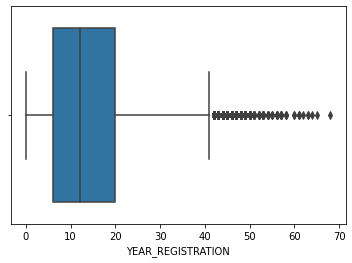

In [28]:
#Convert the 'DAYS_REGISTRATION' column to years,insert the column in the data set,name it and describe the variable
df3['DAYS_REGISTRATION']=df3['DAYS_REGISTRATION'].abs()
df3.insert(22,column='YEAR_REGISTRATION',value=df3.DAYS_REGISTRATION/365)
df3.YEAR_REGISTRATION=df3.YEAR_REGISTRATION.round(decimals=0)
df3.YEAR_REGISTRATION=df3.YEAR_REGISTRATION.astype('int64')
sns.boxplot(df3.YEAR_REGISTRATION)

In [29]:
#Convert the 'DAYS_EMPLOYED' column to years,name it and insert the column in the data set
df3['DAYS_ID_PUBLISH']=df3['DAYS_ID_PUBLISH'].abs()
df3.insert(24,column='YEAR_ID_PUBLISH',value=df3.DAYS_ID_PUBLISH/365)
df3.YEAR_ID_PUBLISH=df3.YEAR_ID_PUBLISH.round(decimals=0)
df3.YEAR_ID_PUBLISH=df3.YEAR_ID_PUBLISH.astype('int64')


<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

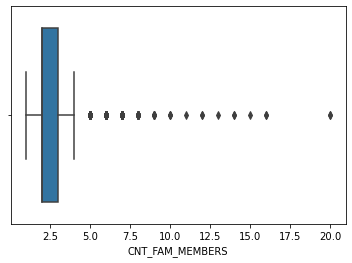

In [30]:
sns.boxplot(df3.CNT_FAM_MEMBERS)

<AxesSubplot:xlabel='EXT_SOURCE_3'>

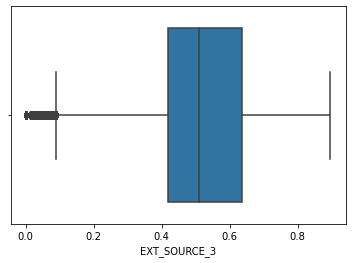

In [31]:
sns.boxplot(df3.EXT_SOURCE_3)

# Previous Application Outlier Treatment 

### Describe each column and create box plot

In [32]:
pd.set_option('display.max_columns',None)
df4.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670214e+06,1.284699e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.297984e+06
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.605408e+01
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185745e+05,3.153966e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


<AxesSubplot:xlabel='AMT_ANNUITY'>

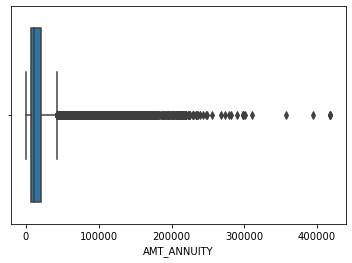

In [33]:
sns.boxplot(df4.AMT_ANNUITY)

# Outlier Capping 

In [34]:
#Outlier capping for the columns in Current application data set
cols=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','YEAR_EMPLOYED','YEAR_REGISTRATION','CNT_FAM_MEMBERS','EXT_SOURCE_3']
for i in cols:
    q1=df3[i].describe()["25%"] 
    q3=df3[i].describe()["75%"] 
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    df3[i]=np.where(df3[i]>upper_bound,upper_bound,df3[i])
    df3[i]=np.where(df3[i]<lower_bound,lower_bound,df3[i])

In [35]:
#Outlier capping for the columns in previous application data set
cols_1=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']
for i in cols_1:
    q1=df4[i].describe()["25%"] 
    q3=df4[i].describe()["75%"] 
    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    df4[i]=np.where(df4[i]>upper_bound,upper_bound,df4[i])
    df4[i]=np.where(df4[i]<lower_bound,lower_bound,df4[i])

# Data Imbalance

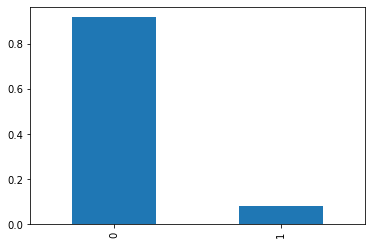

In [36]:
#Check the data imbalance for the target variable using bar chart
df3.TARGET.value_counts(normalize=True).plot.bar()
plt.show()

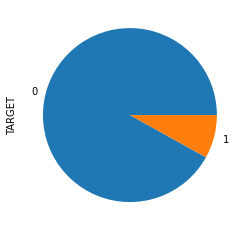

In [37]:
#Check the data imbalance for the target variable using pie chart
df3.TARGET.value_counts().plot.pie()
plt.show()

<AxesSubplot:xlabel='TARGET', ylabel='count'>

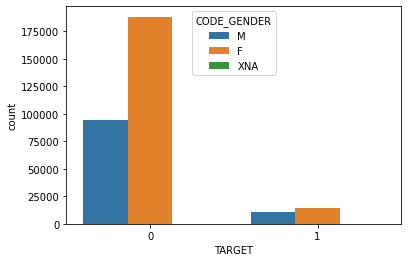

In [38]:
#Check the data imbalance for the target variable using bar chart with bi-variant analysis
sns.countplot(df3.TARGET,hue=df3.CODE_GENDER)

<AxesSubplot:xlabel='TARGET', ylabel='count'>

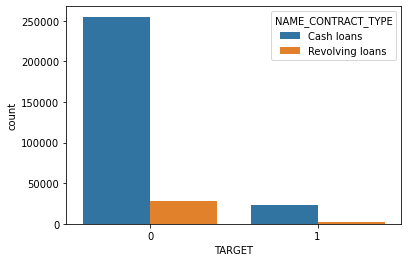

In [39]:
#Check the data imbalance for the target variable using bar chart with bi-variant analysis
sns.countplot(df3.TARGET,hue=df3.NAME_CONTRACT_TYPE)

# Previous Application Data Visualisation

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_ANNUITY'>

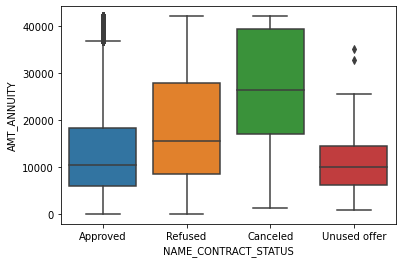

In [40]:
#Create box plot between contract status and Loan Annuity
sns.boxplot(df4.NAME_CONTRACT_STATUS,df4.AMT_ANNUITY)

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_APPLICATION'>

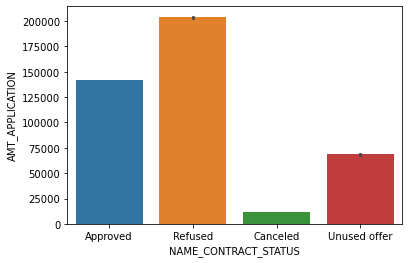

In [41]:

#Create bar plot between contract status and AMT_APPLICATION
sns.barplot(df4.NAME_CONTRACT_STATUS,df4.AMT_APPLICATION)

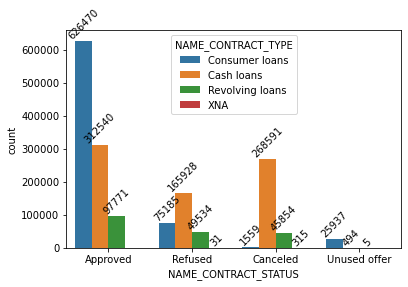

In [42]:
#Create bar plot between contract status and NAME_CONTRACT_TYPE
ax=sns.countplot(df4.NAME_CONTRACT_STATUS,hue=df4.NAME_CONTRACT_TYPE)
for container in ax.containers:
    ax.bar_label(container,rotation=45)

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_CREDIT'>

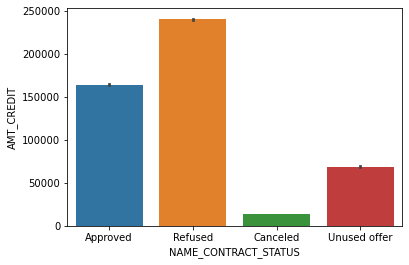

In [43]:
#Create bar plot between contract status and AMT_CREDIT
sns.barplot(df4.NAME_CONTRACT_STATUS,df4.AMT_CREDIT)

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='AMT_GOODS_PRICE'>

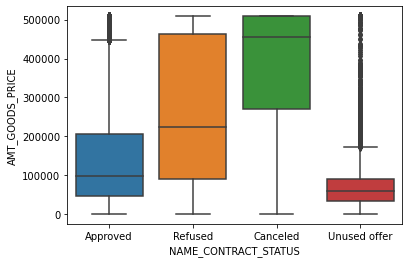

In [44]:
#Create box plot between contract status and AMT_GOODS_PRICE
sns.boxplot(df4.NAME_CONTRACT_STATUS,df4.AMT_GOODS_PRICE)

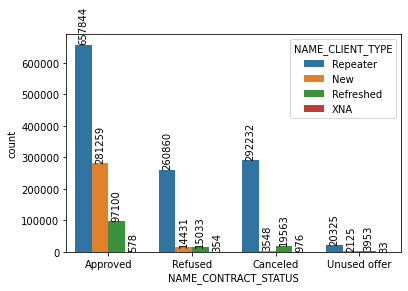

In [45]:
#Create bar plot between contract status and NAME_CLIENT_TYPE
ax=sns.countplot(df4.NAME_CONTRACT_STATUS,hue=df4.NAME_CLIENT_TYPE)
for container in ax.containers:
    ax.bar_label(container,rotation=90)

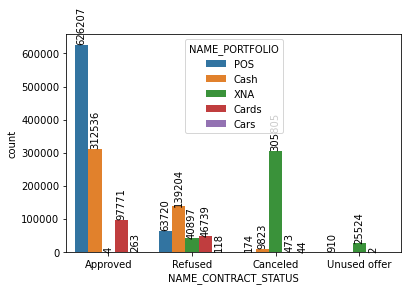

In [46]:
#Create bar plot between contract status and NAME_PORTFOLIO
ax=sns.countplot(df4.NAME_CONTRACT_STATUS,hue=df4.NAME_PORTFOLIO)
for container in ax.containers:
    ax.bar_label(container,rotation=90)

<AxesSubplot:ylabel='NAME_CONTRACT_STATUS'>

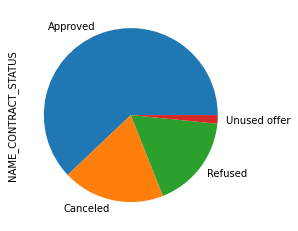

In [47]:
#Create pie chart for contract status
df4.NAME_CONTRACT_STATUS.value_counts().plot.pie()

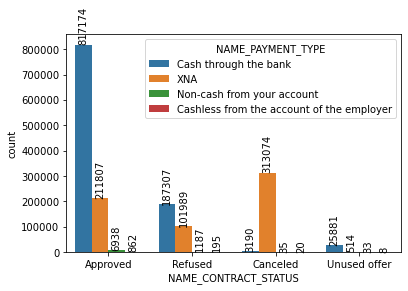

In [48]:
#Create bar plot between contract status and NAME_PAYMENT_TYPE
ax=sns.countplot(df4.NAME_CONTRACT_STATUS,hue=df4.NAME_PAYMENT_TYPE)
for container in ax.containers:
    ax.bar_label(container,rotation=90)

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='CNT_PAYMENT'>

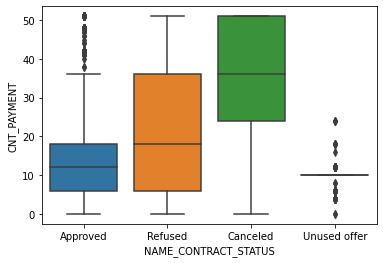

In [49]:
#Create box plot between contract status and CNT_PAYMENT
sns.boxplot(df4.NAME_CONTRACT_STATUS,df4.CNT_PAYMENT)

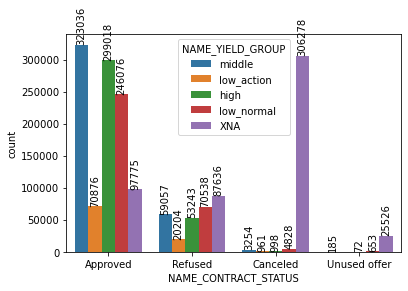

In [50]:
#Create bar plot between contract status and NAME_YIELD_GROUP
ax=sns.countplot(df4.NAME_CONTRACT_STATUS,hue=df4.NAME_YIELD_GROUP)
for container in ax.containers:
    ax.bar_label(container,rotation=90)

# Current Application Data Visualisation

In [69]:
train_0 = df3.loc[df3['TARGET'] == 0]
train_1 = df3.loc[df3['TARGET'] == 1]
train_categorical=df3[['CODE_GENDER','FLAG_OWN_REALTY','FLAG_DOCUMENT_6']]
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df3 = pd.DataFrame()
    df3['0']= ((train_0[col].value_counts())/len(train_0))
    df3['1']= ((train_1[col].value_counts())/len(train_1))
    df3.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

Pltting  CODE_GENDER


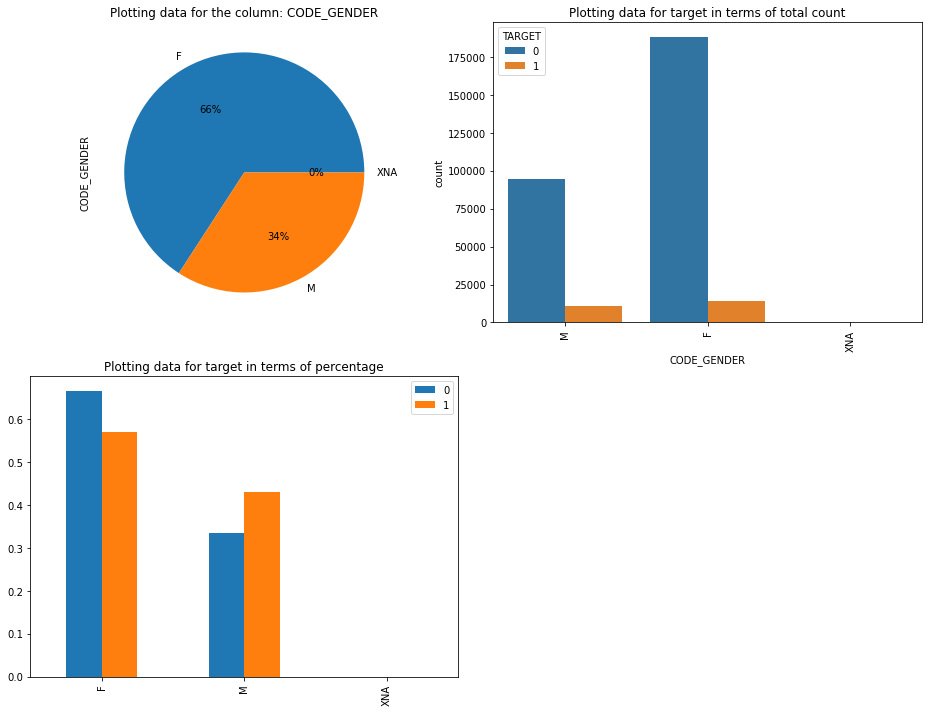

Pltting  FLAG_OWN_REALTY


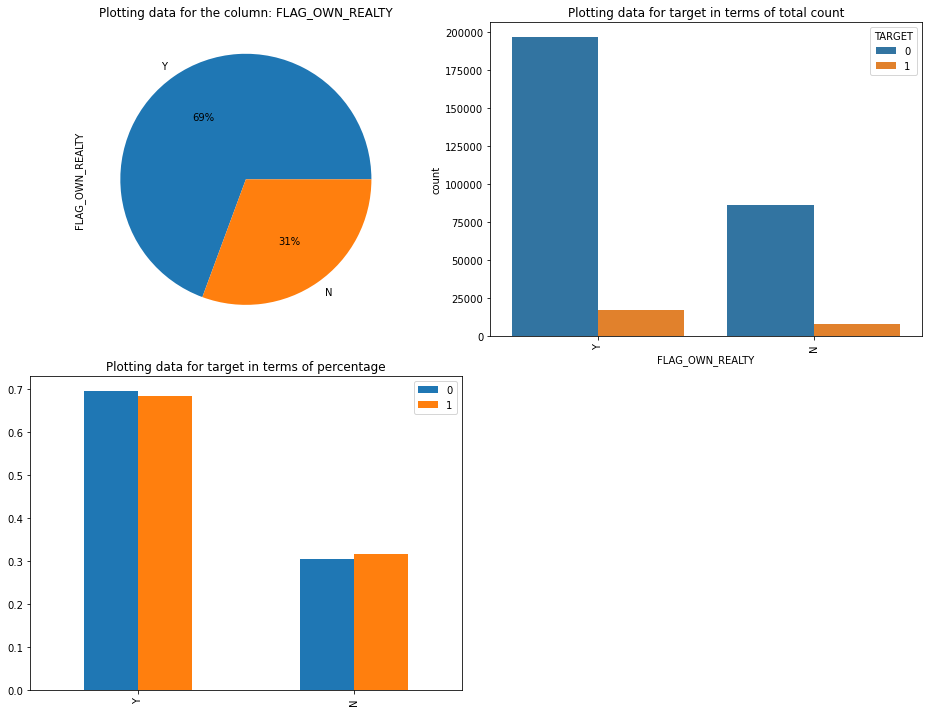

Pltting  FLAG_DOCUMENT_6


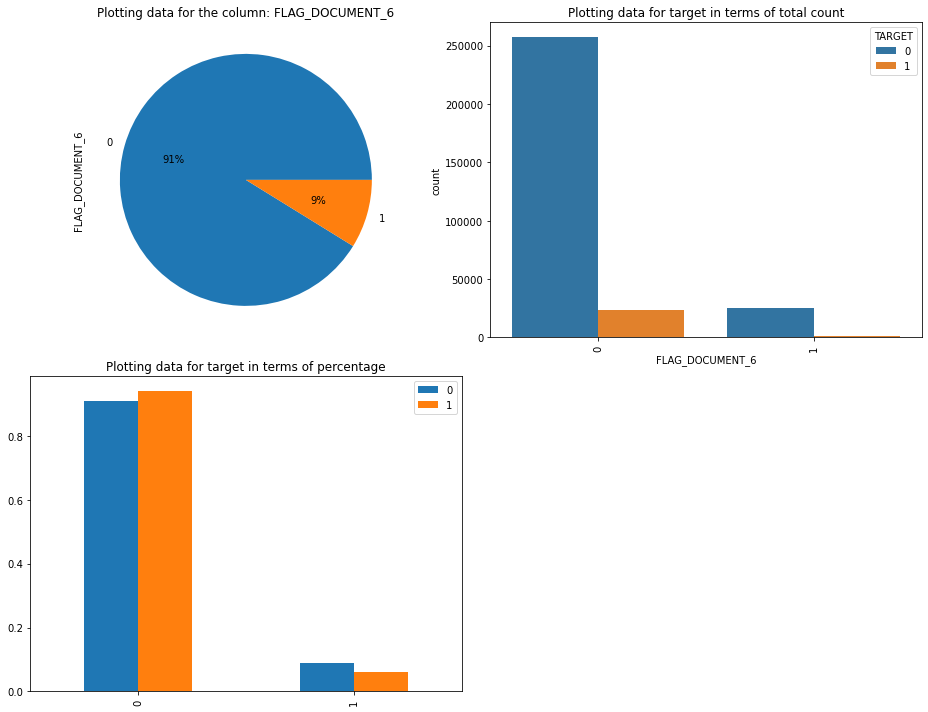

In [70]:
for column in train_categorical:
    print("Pltting ",column)
    plotting(df3, train_0, train_1, column)
    print("=======================================================")

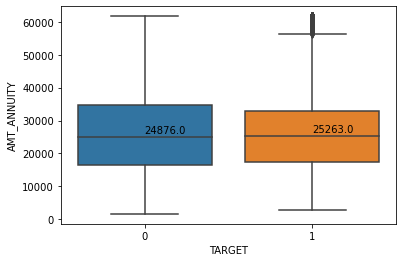

In [51]:
#Create box plot between TARGET and AMT_ANNUITY
ax=sns.boxplot(df3.TARGET,df3.AMT_ANNUITY)
medians=df3.groupby(['TARGET'])['AMT_ANNUITY'].median()
vertical_offset=df3['AMT_ANNUITY'].median()*0.05
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick]+vertical_offset,medians[xtick])

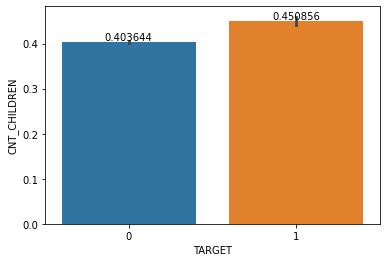

In [52]:
#Create bar plot between TARGET and CNT_CHILDREN
ax=sns.barplot(df3.TARGET,df3.CNT_CHILDREN)
for container in ax.containers:
    ax.bar_label(container)

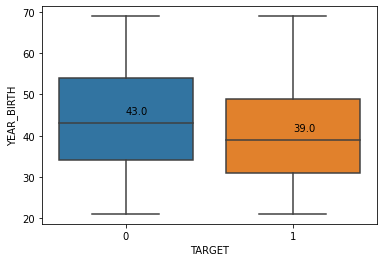

In [53]:
#Create box plot between TARGET and YEAR_BIRTH
ax=sns.boxplot(df3.TARGET,df3.YEAR_BIRTH)
medians=df3.groupby(['TARGET'])['YEAR_BIRTH'].median()
vertical_offset=df3['YEAR_BIRTH'].median()*0.05
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick]+vertical_offset,medians[xtick])

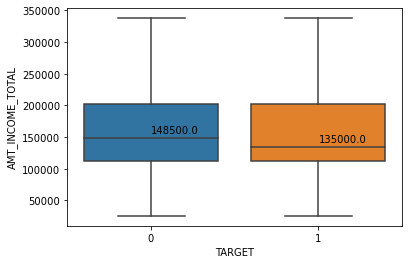

In [54]:
#Create box plot between TARGET and AMT_INCOME_TOTAL
ax=sns.boxplot(df3.TARGET,df3.AMT_INCOME_TOTAL)
medians=df3.groupby(['TARGET'])['AMT_INCOME_TOTAL'].median()
vertical_offset=df3['AMT_INCOME_TOTAL'].median()*0.05
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick]+vertical_offset,medians[xtick])

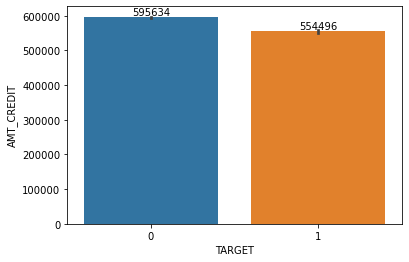

In [55]:
#Create bar plot between TARGET and AMT_CREDIT
ax=sns.barplot(df3.TARGET,df3.AMT_CREDIT)
for container in ax.containers:
    ax.bar_label(container)

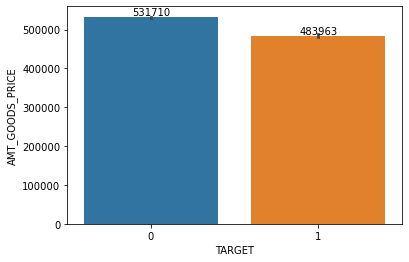

In [56]:
#Create bar plot between TARGET and AMT_GOODS_PRICE
ax=sns.barplot(df3.TARGET,df3.AMT_GOODS_PRICE)
for container in ax.containers:
    ax.bar_label(container)

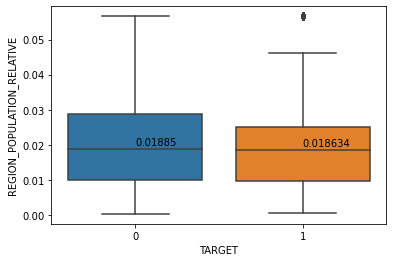

In [57]:
#Create box plot between TARGET and REGION_POPULATION_RELATIVE
ax=sns.boxplot(df3.TARGET,df3.REGION_POPULATION_RELATIVE)
medians=df3.groupby(['TARGET'])['REGION_POPULATION_RELATIVE'].median()
vertical_offset=df3['REGION_POPULATION_RELATIVE'].median()*0.05
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick]+vertical_offset,medians[xtick])

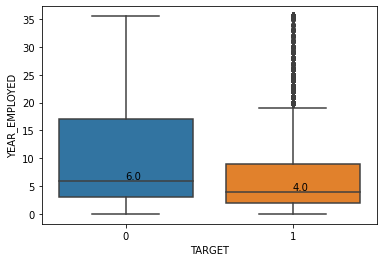

In [58]:
#Create box plot between TARGET and YEAR_EMPLOYED
ax=sns.boxplot(df3.TARGET,df3.YEAR_EMPLOYED)
medians=df3.groupby(['TARGET'])['YEAR_EMPLOYED'].median()
vertical_offset=df3['YEAR_EMPLOYED'].median()*0.05
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick]+vertical_offset,medians[xtick])

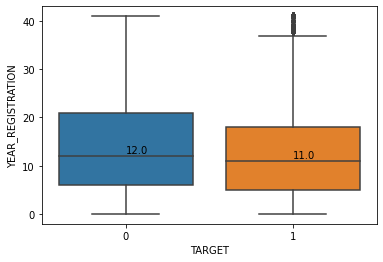

In [59]:
#Create box plot between TARGET and YEAR_REGISTRATION
ax=sns.boxplot(df3.TARGET,df3.YEAR_REGISTRATION)
medians=df3.groupby(['TARGET'])['YEAR_REGISTRATION'].median()
vertical_offset=df3['YEAR_REGISTRATION'].median()*0.05
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick]+vertical_offset,medians[xtick])

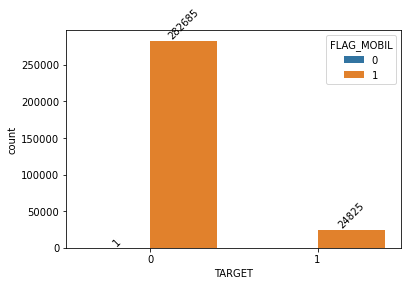

In [60]:
#Create count plot between TARGET and FLAG_MOBIL
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_MOBIL)
for container in ax.containers:
    ax.bar_label(container,rotation=45)

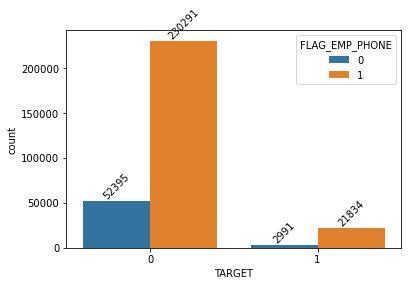

In [61]:
#Create count plot between TARGET and FLAG_EMP_PHONE
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_EMP_PHONE)
for container in ax.containers:
    ax.bar_label(container,rotation=45)

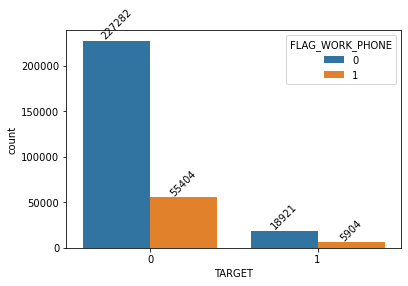

In [62]:
#Create count plot between TARGET and FLAG_WORK_PHONE
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_WORK_PHONE)
for container in ax.containers:
    ax.bar_label(container,rotation=45)

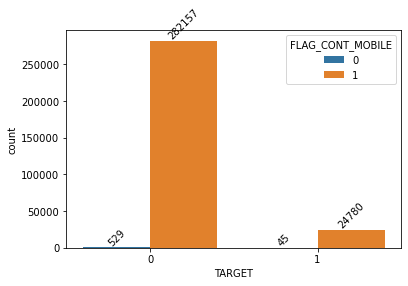

In [63]:
#Create count plot between TARGET and FLAG_CONT_MOBILE
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_CONT_MOBILE)
for container in ax.containers:
    ax.bar_label(container,rotation=45)

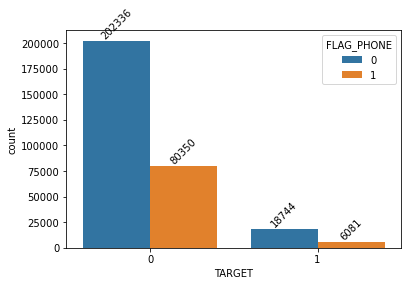

In [64]:
#Create count plot between TARGET and FLAG_PHONE
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_PHONE)
for container in ax.containers:
    ax.bar_label(container,rotation=45)

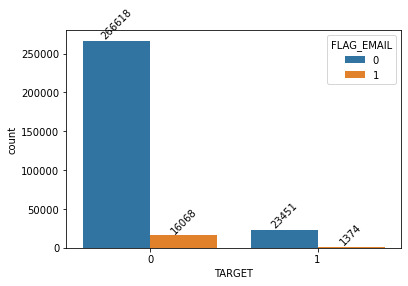

In [65]:
#Create count plot between TARGET and FLAG_EMAIL
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_EMAIL)
for container in ax.containers:
    ax.bar_label(container,rotation=45)

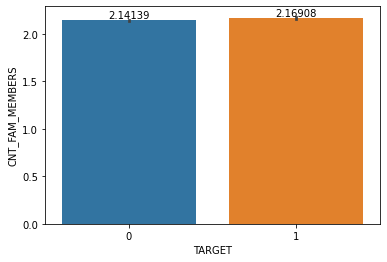

In [66]:
#Create bar plot between TARGET and CNT_FAM_MEMBERS
ax=sns.barplot(df3.TARGET,df3.CNT_FAM_MEMBERS)
for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:>

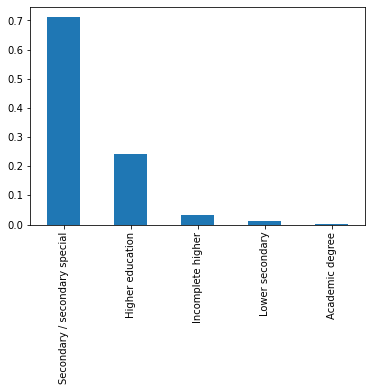

In [67]:
#Create bar plot to understand the category of NAME_EDUCATION_TYPE who applied for maximum number of loans
df3.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()

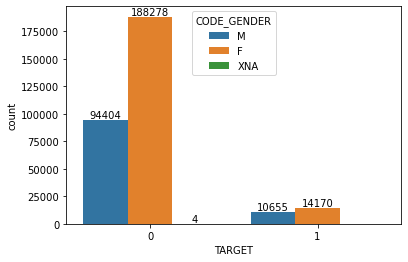

In [76]:
ax=sns.countplot(df3.TARGET,hue=df3.CODE_GENDER)
for container in ax.containers:
    ax.bar_label(container)

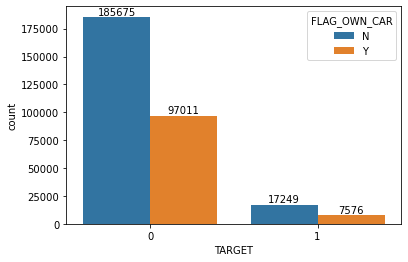

In [69]:
#Create bar plot between TARGET and FLAG_OWN_CAR
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_OWN_CAR)
for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:xlabel='TARGET'>

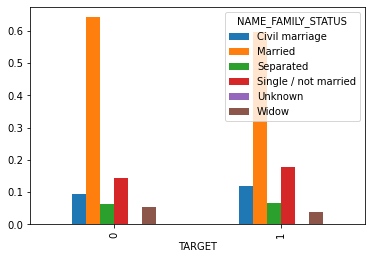

In [87]:
df3.groupby('TARGET')['NAME_FAMILY_STATUS'].value_counts(normalize=True).unstack('NAME_FAMILY_STATUS').plot.bar()

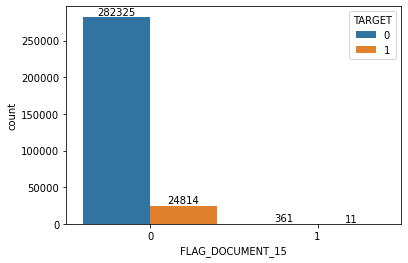

In [85]:
#Create bar plot between TARGET and FLAG_OWN_REALTY
ax=sns.countplot(df3.FLAG_DOCUMENT_15,hue=df3.TARGET)
for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:>

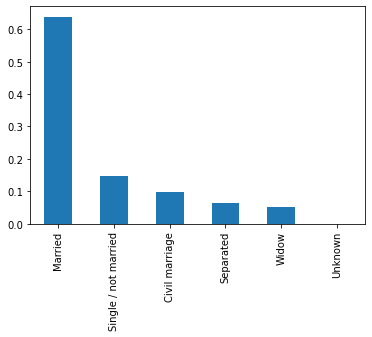

In [71]:
#Create bar plot to understand the category of NAME_FAMILY_STATUS who applied for maximum number of loans
df3.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar()

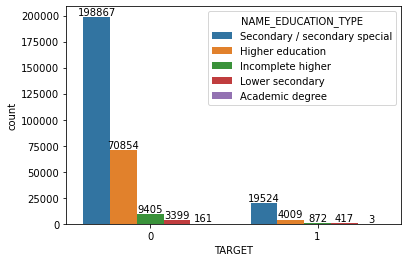

In [72]:
#Create count plot between TARGET and NAME_EDUCATION_TYPE
ax=sns.countplot(df3.TARGET,hue=df3.NAME_EDUCATION_TYPE)
for container in ax.containers:
    ax.bar_label(container)

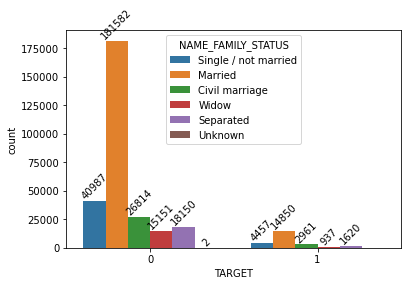

In [73]:
#Create count plot between TARGET and NAME_FAMILY_STATUS
ax=sns.countplot(df3.TARGET,hue=df3.NAME_FAMILY_STATUS)
for container in ax.containers:
    ax.bar_label(container,rotation=45)

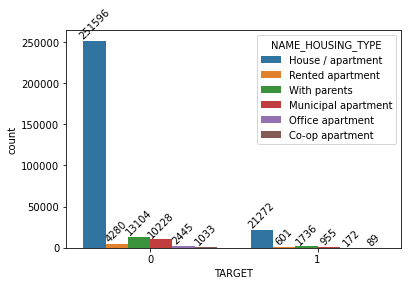

In [74]:
#Create count plot between TARGET and NAME_HOUSING_TYPE
ax=sns.countplot(df3.TARGET,hue=df3.NAME_HOUSING_TYPE)
for container in ax.containers:
    ax.bar_label(container,rotation=45)

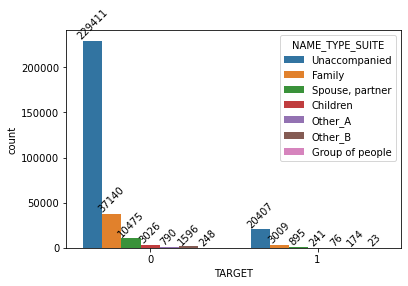

In [75]:
#Create count plot between TARGET and NAME_TYPE_SUITE
ax=sns.countplot(df3.TARGET,hue=df3.NAME_TYPE_SUITE)
for container in ax.containers:
    ax.bar_label(container,rotation=45)

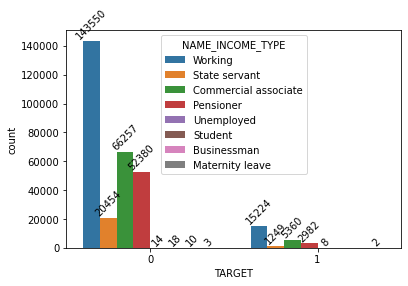

In [76]:
#Create count plot between TARGET and NAME_INCOME_TYPE
ax=sns.countplot(df3.TARGET,hue=df3.NAME_INCOME_TYPE)
for container in ax.containers:
    ax.bar_label(container,rotation=45)

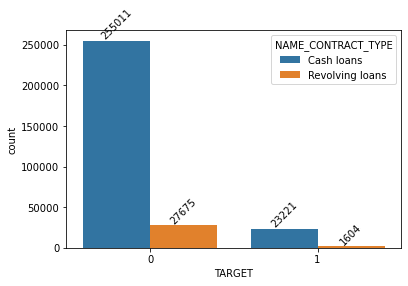

In [77]:
#Create count plot between TARGET and NAME_CONTRACT_TYPE
ax=sns.countplot(df3.TARGET,hue=df3.NAME_CONTRACT_TYPE)
for container in ax.containers:
    ax.bar_label(container,rotation=45)

<AxesSubplot:>

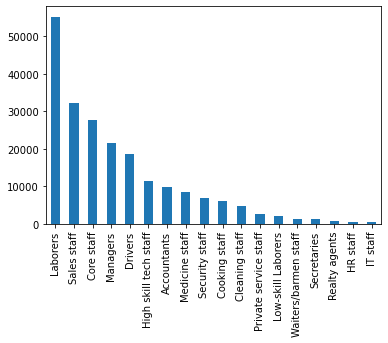

In [78]:
#Create bar plot to understand the category of OCCUPATION_TYPE who applied for maximum number of loans
df3.OCCUPATION_TYPE.value_counts().plot.bar()

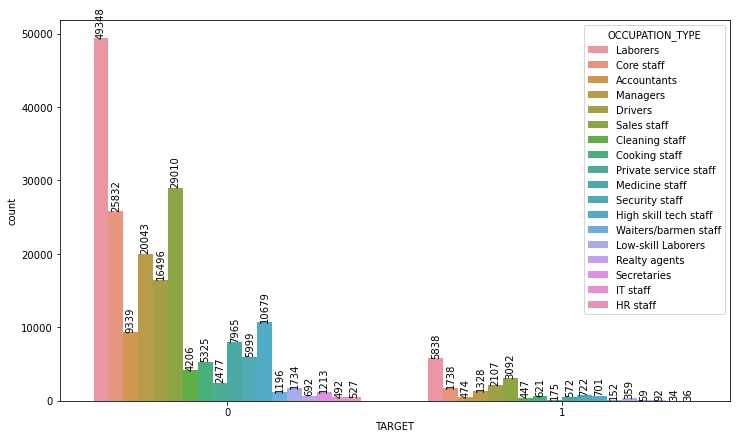

In [79]:
#Create count plot between TARGET and OCCUPATION_TYPE
plt.figure(figsize=(12,7))
ax=sns.countplot(df3.TARGET,hue=df3.OCCUPATION_TYPE)
for container in ax.containers:
    ax.bar_label(container,rotation=90)

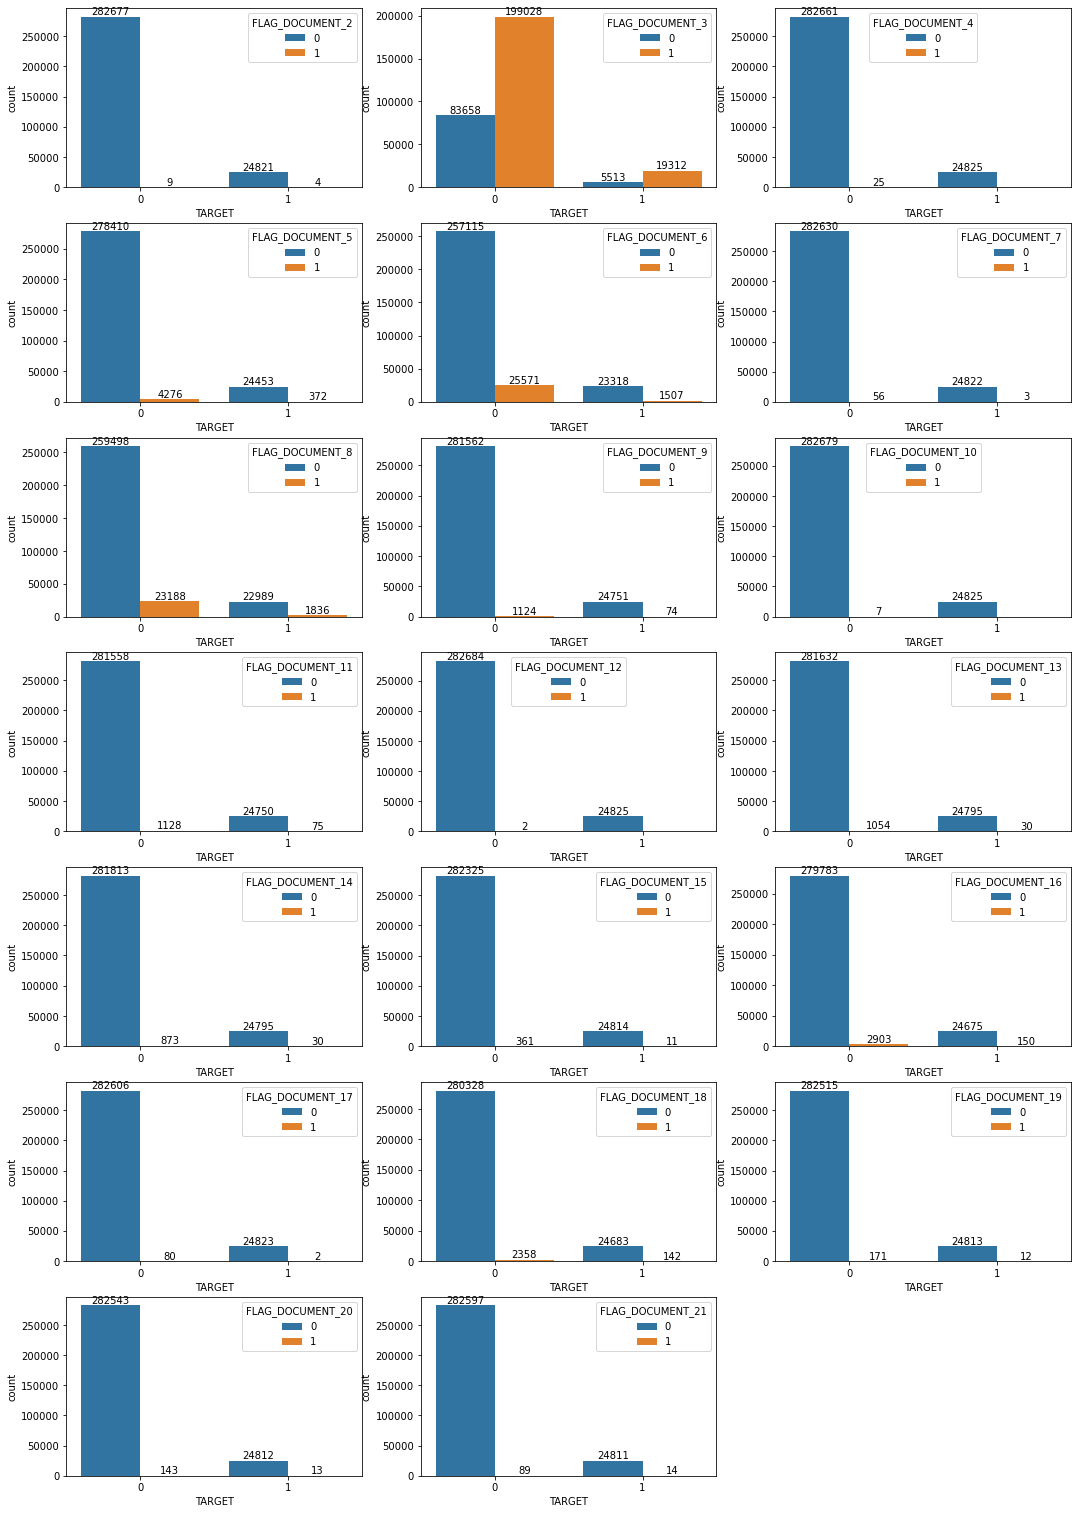

In [80]:
#Create subplots between TARGET variable and all FLAG_DOCUMENT columns
plt.figure(figsize=(18,27))
plt.subplot(7,3,1)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_2)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,2)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_3)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,3)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_4)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,4)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_5)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,5)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_6)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,6)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_7)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,7)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_8)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,8)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_9)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,9)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_10)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,10)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_11)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,11)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_12)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,12)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_13)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,13)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_14)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,14)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_15)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,15)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_16)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,16)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_17)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,17)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_18)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,18)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_19)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,19)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_20)
for container in ax.containers:
    ax.bar_label(container)
plt.subplot(7,3,20)
ax=sns.countplot(df3.TARGET,hue=df3.FLAG_DOCUMENT_21)
for container in ax.containers:
    ax.bar_label(container)

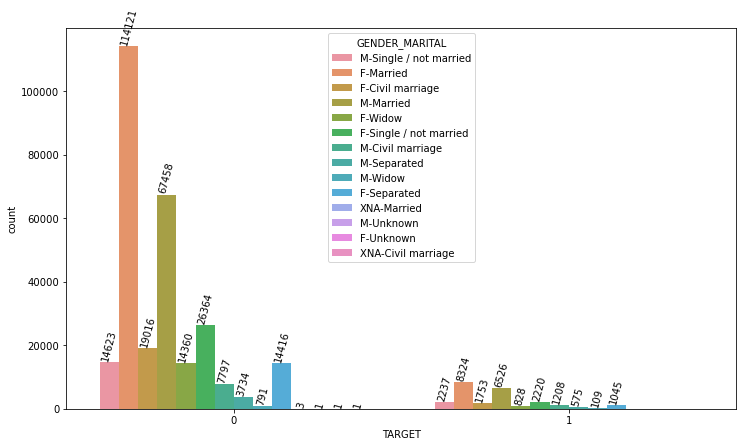

In [81]:
#Create a new column GENDER_MARITAL by conactenating CODE_GENDER and NAME_FAMILY_STATUS
#Create count plot between TARGET and GENDER_MARITAL
plt.figure(figsize=(12,7))
df3['GENDER_MARITAL']=df3['CODE_GENDER']+'-'+df3['NAME_FAMILY_STATUS']
ax=sns.countplot(df3.TARGET,hue=df3.GENDER_MARITAL)
for container in ax.containers:
    ax.bar_label(container,ROTATION=75)

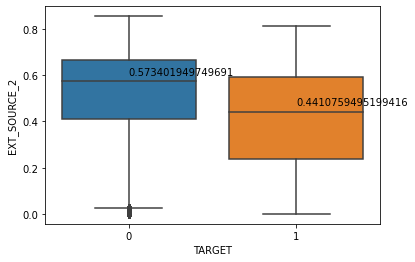

In [82]:
#Create box plot between TARGET and EXT_SOURCE_2
ax=sns.boxplot(df3.TARGET,df3.EXT_SOURCE_2)
medians=df3.groupby(['TARGET'])['EXT_SOURCE_2'].median()
vertical_offset=df3['EXT_SOURCE_2'].median()*0.05
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick]+vertical_offset,medians[xtick])

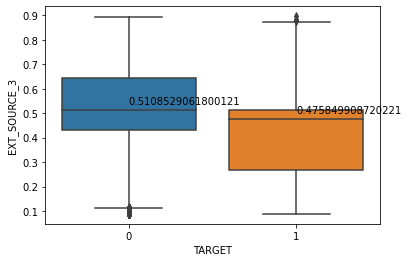

In [83]:
#Create box plot between TARGET and EXT_SOURCE_3
ax=sns.boxplot(df3.TARGET,df3.EXT_SOURCE_3)
medians=df3.groupby(['TARGET'])['EXT_SOURCE_3'].median()
vertical_offset=df3['EXT_SOURCE_3'].median()*0.05
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick]+vertical_offset,medians[xtick])

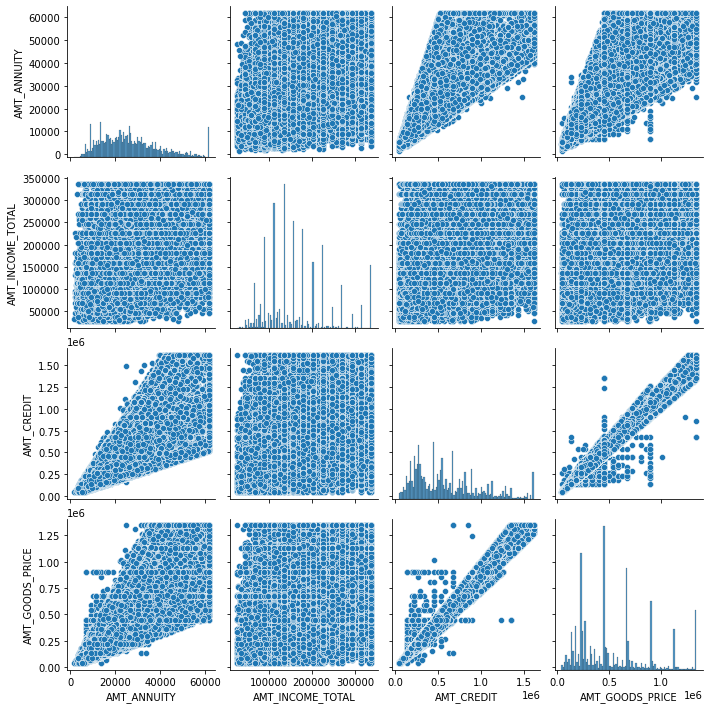

In [84]:
#Create a pair plot for top 5 major variables of current application data set
sns.pairplot(df3[['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE']])
plt.show()

<AxesSubplot:xlabel='SALARY_BUCKET', ylabel='CODE_GENDER'>

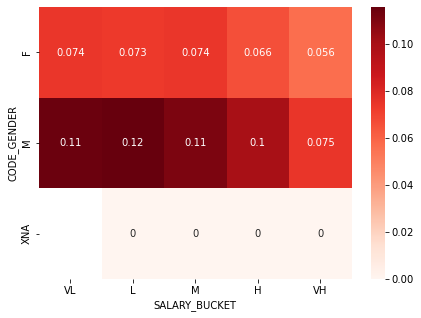

In [85]:
#Covert salaries to different buckets
#Create a heat map for the salary bucket wrt the gender 
plt.figure(figsize=(7,5))
df3['SALARY_BUCKET']=pd.qcut(df3.AMT_INCOME_TOTAL,[0,0.2,0.4,0.6,0.8,1],["VL","L","M","H","VH"])
res=pd.pivot_table(data=df3,index='CODE_GENDER',columns='SALARY_BUCKET',values='TARGET')
sns.heatmap(res,cmap='Reds',annot=True)

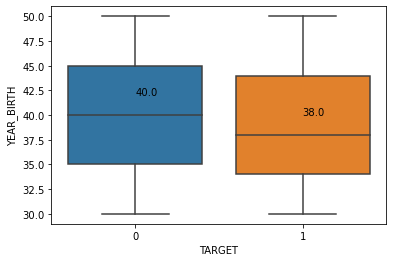

In [86]:
#Create a box plot between TARGET and people of age from 30 to 50
middle_age=df3[(df3['YEAR_BIRTH']>=30) & (df3['YEAR_BIRTH']<=50)]
ax=sns.boxplot(middle_age.TARGET,middle_age.YEAR_BIRTH)
medians=middle_age.groupby(['TARGET'])['YEAR_BIRTH'].median()
vertical_offset=middle_age['YEAR_BIRTH'].median()*0.05
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick]+vertical_offset,medians[xtick])

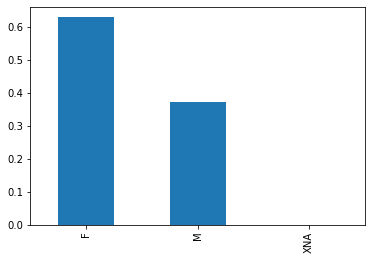

In [87]:
#Create a bar plot for CODE_GENDER in the middle_age data frame
middle_age.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.show()

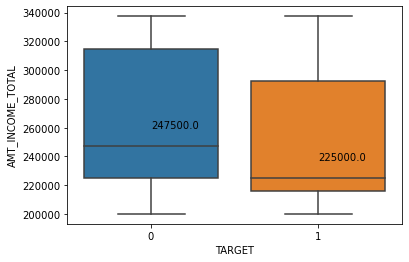

In [88]:
#Create a box plot between TARGET and people with income from 2 Lakhs to 3.5 Lakhs
high_salary=df3[(df3['AMT_INCOME_TOTAL']>=200000) & (df3['AMT_INCOME_TOTAL']<=350000)]
ax=sns.boxplot(high_salary.TARGET,high_salary.AMT_INCOME_TOTAL)
medians=high_salary.groupby(['TARGET'])['AMT_INCOME_TOTAL'].median()
vertical_offset=high_salary['AMT_INCOME_TOTAL'].median()*0.05
for xtick in ax.get_xticks():
    ax.text(xtick,medians[xtick]+vertical_offset,medians[xtick])

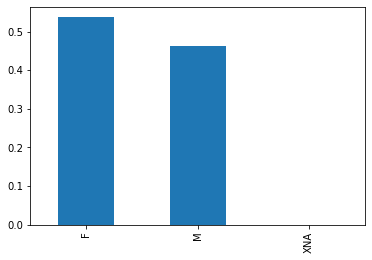

In [89]:
#Create a bar plot for CODE_GENDER in the high_salary data frame
high_salary.CODE_GENDER.value_counts(normalize=True).plot.bar()
plt.show()

# Correlation 

In [90]:
#Top 10 Correlation of young age (less than 30 years) segment of the current application data set
young_age=df3[df3['YEAR_BIRTH']<30]
df5=young_age[['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','CNT_CHILDREN','REGION_POPULATION_RELATIVE','YEAR_EMPLOYED','YEAR_REGISTRATION','CNT_FAM_MEMBERS','REGION_RATING_CLIENT']]
df5.corr()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,CNT_CHILDREN,REGION_POPULATION_RELATIVE,YEAR_EMPLOYED,YEAR_REGISTRATION,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
AMT_ANNUITY,1.000000,0.465124,0.777028,0.774048,-0.004039,0.068516,0.064934,-0.034020,0.040771,-0.094327
AMT_INCOME_TOTAL,0.465124,1.000000,0.394420,0.399419,-0.080437,0.165345,0.048606,-0.015433,-0.061493,-0.222208
AMT_CREDIT,0.777028,0.394420,1.000000,0.984035,0.015575,0.068269,0.062271,-0.039097,0.065877,-0.081624
AMT_GOODS_PRICE,0.774048,0.399419,0.984035,1.000000,0.009862,0.075706,0.062777,-0.038053,0.063203,-0.087635
CNT_CHILDREN,-0.004039,-0.080437,0.015575,0.009862,1.000000,-0.033531,0.091523,-0.109262,0.871801,0.047286
REGION_POPULATION_RELATIVE,0.068516,0.165345,0.068269,0.075706,-0.033531,1.000000,-0.005376,0.012038,-0.032881,-0.505661
YEAR_EMPLOYED,0.064934,0.048606,0.062271,0.062777,0.091523,-0.005376,1.000000,-0.013076,0.115514,0.006250
YEAR_REGISTRATION,-0.034020,-0.015433,-0.039097,-0.038053,-0.109262,0.012038,-0.013076,1.000000,-0.129261,-0.113293
CNT_FAM_MEMBERS,0.040771,-0.061493,0.065877,0.063203,0.871801,-0.032881,0.115514,-0.129261,1.000000,0.049649
REGION_RATING_CLIENT,-0.094327,-0.222208,-0.081624,-0.087635,0.047286,-0.505661,0.006250,-0.113293,0.049649,1.000000


In [91]:
#Top 10 Correlation of middle age(between 30 to 50 years) segment of the current application data set
df6=middle_age[['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','CNT_CHILDREN','REGION_POPULATION_RELATIVE','YEAR_EMPLOYED','YEAR_REGISTRATION','CNT_FAM_MEMBERS','REGION_RATING_CLIENT']]
df6.corr()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,CNT_CHILDREN,REGION_POPULATION_RELATIVE,YEAR_EMPLOYED,YEAR_REGISTRATION,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
AMT_ANNUITY,1.000000,0.470807,0.780100,0.781451,-0.011316,0.112566,0.020705,-0.019413,0.031874,-0.131509
AMT_INCOME_TOTAL,0.470807,1.000000,0.390207,0.394431,-0.023340,0.180061,0.006409,-0.045548,-0.020765,-0.229447
AMT_CREDIT,0.780100,0.390207,1.000000,0.984161,-0.018512,0.093337,0.054400,0.002460,0.028039,-0.101991
AMT_GOODS_PRICE,0.781451,0.394431,0.984161,1.000000,-0.022704,0.098035,0.057498,0.000426,0.026396,-0.103437
CNT_CHILDREN,-0.011316,-0.023340,-0.018512,-0.022704,1.000000,-0.026059,-0.041962,-0.131342,0.903636,0.038030
REGION_POPULATION_RELATIVE,0.112566,0.180061,0.093337,0.098035,-0.026059,1.000000,-0.012341,0.054863,-0.023726,-0.524786
YEAR_EMPLOYED,0.020705,0.006409,0.054400,0.057498,-0.041962,-0.012341,1.000000,0.103250,-0.029120,0.019067
YEAR_REGISTRATION,-0.019413,-0.045548,0.002460,0.000426,-0.131342,0.054863,0.103250,1.000000,-0.135945,-0.096441
CNT_FAM_MEMBERS,0.031874,-0.020765,0.028039,0.026396,0.903636,-0.023726,-0.029120,-0.135945,1.000000,0.041645
REGION_RATING_CLIENT,-0.131509,-0.229447,-0.101991,-0.103437,0.038030,-0.524786,0.019067,-0.096441,0.041645,1.000000


In [92]:
#Top 10 Correlation of old age (above 50 years) segment of the current application data set
old_age=df3[df3['YEAR_BIRTH']>50]
df7=young_age[['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','CNT_CHILDREN','REGION_POPULATION_RELATIVE','YEAR_EMPLOYED','YEAR_REGISTRATION','CNT_FAM_MEMBERS','REGION_RATING_CLIENT']]
df7.corr()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,CNT_CHILDREN,REGION_POPULATION_RELATIVE,YEAR_EMPLOYED,YEAR_REGISTRATION,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
AMT_ANNUITY,1.000000,0.465124,0.777028,0.774048,-0.004039,0.068516,0.064934,-0.034020,0.040771,-0.094327
AMT_INCOME_TOTAL,0.465124,1.000000,0.394420,0.399419,-0.080437,0.165345,0.048606,-0.015433,-0.061493,-0.222208
AMT_CREDIT,0.777028,0.394420,1.000000,0.984035,0.015575,0.068269,0.062271,-0.039097,0.065877,-0.081624
AMT_GOODS_PRICE,0.774048,0.399419,0.984035,1.000000,0.009862,0.075706,0.062777,-0.038053,0.063203,-0.087635
CNT_CHILDREN,-0.004039,-0.080437,0.015575,0.009862,1.000000,-0.033531,0.091523,-0.109262,0.871801,0.047286
REGION_POPULATION_RELATIVE,0.068516,0.165345,0.068269,0.075706,-0.033531,1.000000,-0.005376,0.012038,-0.032881,-0.505661
YEAR_EMPLOYED,0.064934,0.048606,0.062271,0.062777,0.091523,-0.005376,1.000000,-0.013076,0.115514,0.006250
YEAR_REGISTRATION,-0.034020,-0.015433,-0.039097,-0.038053,-0.109262,0.012038,-0.013076,1.000000,-0.129261,-0.113293
CNT_FAM_MEMBERS,0.040771,-0.061493,0.065877,0.063203,0.871801,-0.032881,0.115514,-0.129261,1.000000,0.049649
REGION_RATING_CLIENT,-0.094327,-0.222208,-0.081624,-0.087635,0.047286,-0.505661,0.006250,-0.113293,0.049649,1.000000


In [93]:
#Top 10 correlation of female segment of current application data set
female=df3[df3['CODE_GENDER'].str.contains('F')]
df7=female[['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','CNT_CHILDREN','REGION_POPULATION_RELATIVE','YEAR_EMPLOYED','YEAR_REGISTRATION','CNT_FAM_MEMBERS','REGION_RATING_CLIENT']]
df7.corr()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,CNT_CHILDREN,REGION_POPULATION_RELATIVE,YEAR_EMPLOYED,YEAR_REGISTRATION,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
AMT_ANNUITY,1.000000,0.491095,0.807605,0.809315,0.011833,0.109732,-0.073899,-0.036498,0.076542,-0.129193
AMT_INCOME_TOTAL,0.491095,1.000000,0.425181,0.426594,-0.012566,0.170378,-0.111551,-0.045431,-0.016348,-0.220170
AMT_CREDIT,0.807605,0.425181,1.000000,0.985441,-0.012050,0.091609,-0.031966,-0.010082,0.055953,-0.100851
AMT_GOODS_PRICE,0.809315,0.426594,0.985441,1.000000,-0.017278,0.095706,-0.028821,-0.011164,0.053667,-0.101911
CNT_CHILDREN,0.011833,-0.012566,-0.012050,-0.017278,1.000000,-0.025650,-0.292766,-0.207854,0.857107,0.027267
REGION_POPULATION_RELATIVE,0.109732,0.170378,0.091609,0.095706,-0.025650,1.000000,-0.007716,0.048686,-0.024570,-0.516415
YEAR_EMPLOYED,-0.073899,-0.111551,-0.031966,-0.028821,-0.292766,-0.007716,1.000000,0.267187,-0.275731,0.029819
YEAR_REGISTRATION,-0.036498,-0.045431,-0.010082,-0.011164,-0.207854,0.048686,0.267187,1.000000,-0.195897,-0.083872
CNT_FAM_MEMBERS,0.076542,-0.016348,0.055953,0.053667,0.857107,-0.024570,-0.275731,-0.195897,1.000000,0.031413
REGION_RATING_CLIENT,-0.129193,-0.220170,-0.100851,-0.101911,0.027267,-0.516415,0.029819,-0.083872,0.031413,1.000000


In [94]:
#Top 10 correlation of male segment of current application data set
male=df3[df3['CODE_GENDER'].str.contains('M')]
df8=male[['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','CNT_CHILDREN','REGION_POPULATION_RELATIVE','YEAR_EMPLOYED','YEAR_REGISTRATION','CNT_FAM_MEMBERS','REGION_RATING_CLIENT']]
df8.corr()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,CNT_CHILDREN,REGION_POPULATION_RELATIVE,YEAR_EMPLOYED,YEAR_REGISTRATION,CNT_FAM_MEMBERS,REGION_RATING_CLIENT
AMT_ANNUITY,1.000000,0.474177,0.767871,0.770950,0.032755,0.093944,-0.034343,-0.030504,0.074351,-0.121089
AMT_INCOME_TOTAL,0.474177,1.000000,0.399244,0.405846,0.076345,0.168795,-0.113027,-0.095380,0.090034,-0.228897
AMT_CREDIT,0.767871,0.399244,1.000000,0.985100,0.025082,0.081053,0.022460,0.000424,0.083025,-0.091498
AMT_GOODS_PRICE,0.770950,0.405846,0.985100,1.000000,0.023125,0.085872,0.024775,-0.001109,0.083327,-0.092812
CNT_CHILDREN,0.032755,0.076345,0.025082,0.023125,1.000000,-0.026381,-0.139410,-0.139093,0.894787,0.024487
REGION_POPULATION_RELATIVE,0.093944,0.168795,0.081053,0.085872,-0.026381,1.000000,0.002705,0.055823,-0.020376,-0.535026
YEAR_EMPLOYED,-0.034343,-0.113027,0.022460,0.024775,-0.139410,0.002705,1.000000,0.183686,-0.066720,0.035397
YEAR_REGISTRATION,-0.030504,-0.095380,0.000424,-0.001109,-0.139093,0.055823,0.183686,1.000000,-0.115160,-0.077055
CNT_FAM_MEMBERS,0.074351,0.090034,0.083025,0.083327,0.894787,-0.020376,-0.066720,-0.115160,1.000000,0.030903
REGION_RATING_CLIENT,-0.121089,-0.228897,-0.091498,-0.092812,0.024487,-0.535026,0.035397,-0.077055,0.030903,1.000000


# Merge the two data frames

In [95]:
#Merge the current application and previous data set
df = pd.merge(left=df4,right=df3, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_x,AMT_ANNUITY_x,AMT_APPLICATION,AMT_CREDIT_x,AMT_GOODS_PRICE_x,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,TARGET,NAME_CONTRACT_TYPE_y,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_y,AMT_ANNUITY_y,AMT_GOODS_PRICE_y,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,YEAR_BIRTH,DAYS_EMPLOYED,YEAR_EMPLOYED,DAYS_REGISTRATION,YEAR_REGISTRATION,DAYS_ID_PUBLISH,YEAR_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,GENDER_MARITAL,SALARY_BUCKET
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,0.0,Cash loans,F,N,Y,1.0,225000.0,533668.5,25803.0,477000.0,Unaccompanied,State servant,Incomplete higher,Married,House / apartment,0.046220,14443.0,40.0,7392.0,20.0,8447.0,23.0,4120.0,11.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,3.0,1.0,1.0,TUESDAY,17.0,0.0,1.0,1.0,0.0,0.0,0.0,Military,0.683797,0.510853,3.0,0.0,3.0,0.0,-548.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F-Married,H
1,2802425,108129,Cash loans,25188.615,422820.0,504805.5,508738.5,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,0.0,Revolving loans,F,N,N,0.0,90000.0,135000.0,6750.0,135000.0,Family,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,21335.0,58.0,1255.0,3.0,5455.0,15.0,4263.0,12.0,1.0,1.0,0.0,1.0,0.0,0.0,Private service staff,2.0,2.0,2.0,SUNDAY,10.0,0.0,0.0,0.0,0.0,0.0,0.0,Self-employed,0.663524,0.510853,0.0,0.0,0.0,0.0,-517.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F-Civil marriage,VL
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,0.0,Cash loans,F,N,Y,2.5,40500.0,284400.0,16456.5,225000.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.025164,10541.0,29.0,1177.0,3.0,1673.0,5.0,1964.0,5.0,1.0,1.0,0.0,1.0,0.0,0.0,Core staff,4.5,2.0,2.0,TUESDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Postal,0.250565,0.510853,4.0,1.0,4.0,0.0,-301.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,F-Married,VL
3,2819243,176158,Cash loans,42163.380,422820.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,X

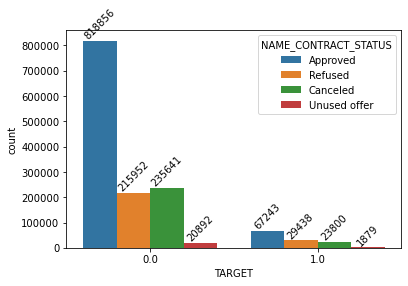

In [96]:
#Create countplot for contract status wrt target column
ax=sns.countplot(df.TARGET,hue=df.NAME_CONTRACT_STATUS)
for container in ax.containers:
    ax.bar_label(container,rotation=45)

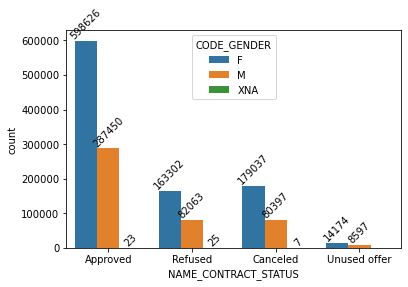

In [97]:
#Create the countplot for contract status wrt the gender
ax=sns.countplot(df.NAME_CONTRACT_STATUS,hue=df.CODE_GENDER)
for container in ax.containers:
    ax.bar_label(container,rotation=45)

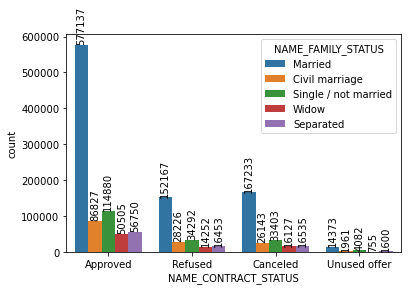

In [98]:
ax=sns.countplot(df.NAME_CONTRACT_STATUS,hue=df.NAME_FAMILY_STATUS)
for container in ax.containers:
    ax.bar_label(container,rotation=90)

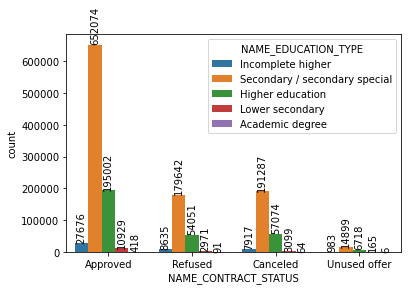

In [99]:
ax=sns.countplot(df.NAME_CONTRACT_STATUS,hue=df.NAME_EDUCATION_TYPE)
for container in ax.containers:
    ax.bar_label(container,rotation=90)